In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression
 
sns.set_theme(style="whitegrid")
# sns.set_theme(style="darkgrid", rc={"axes.facecolor": "lightgrey"})
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False


2025년 높은 점유율 예상 Top5 브랜드: ['Mercedes-Benz', 'BMW', 'Volvo', 'Lexus', 'Audi']


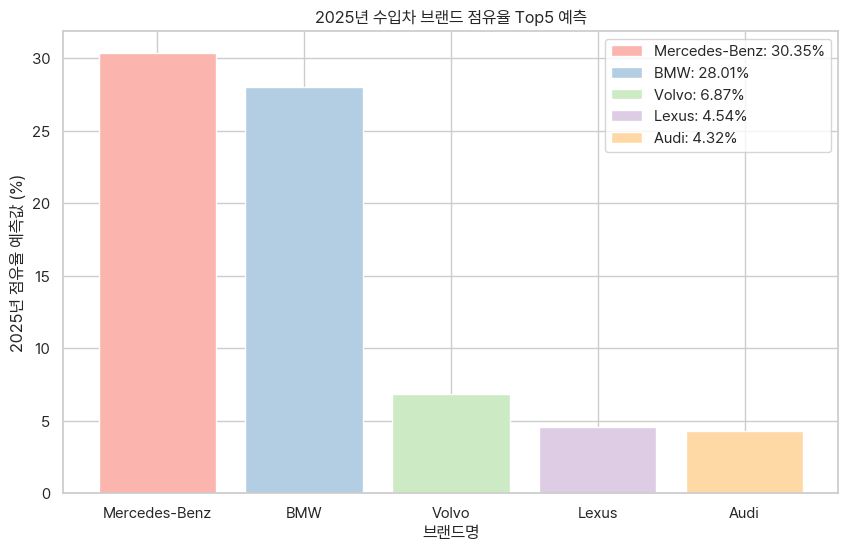

In [14]:
df = pd.read_csv('2014-2024브랜드.csv', encoding='utf-8')
df = df[df["브랜드명"] != "Total"]  # "Total" 브랜드 제외
years = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

future_year = 2025
predictions = []

# 각 브랜드에 대해 2025년 예측값 계산
for brand in df['브랜드명']:
    y = [] 
    for year in years:
        y.append(df[f'{year}점유율'][df['브랜드명'] == brand].values[0])
    
    x = np.array([int(year) for year in years]).reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(x, y)  
    
    pred_2025 = model.predict([[2025]])
    predictions.append((brand, pred_2025[0]))

# 예측값을 df에 추가 (모든 브랜드에 대해 2025년 점유율 예측값)
for brand, pred in predictions:
    df.loc[df['브랜드명'] == brand, '2025점유율'] = pred

# 상위 5개 브랜드 추출
predictions = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]
top5_brands = [brand for brand, pred in predictions]

print("2025년 높은 점유율 예상 Top5 브랜드:", top5_brands)

# 그래프 그리기
colors = sns.color_palette('Pastel1', len(df["브랜드명"]))

plt.figure(figsize=(10, 6))
for idx, (brand, pred) in enumerate(predictions):
    plt.bar(brand, pred, label=f'{brand}: {pred:.2f}%', color=colors[idx])  
plt.xlabel('브랜드명')
plt.ylabel('2025년 점유율 예측값 (%)')
plt.title('2025년 수입차 브랜드 점유율 Top5 예측')
plt.legend()
plt.show()

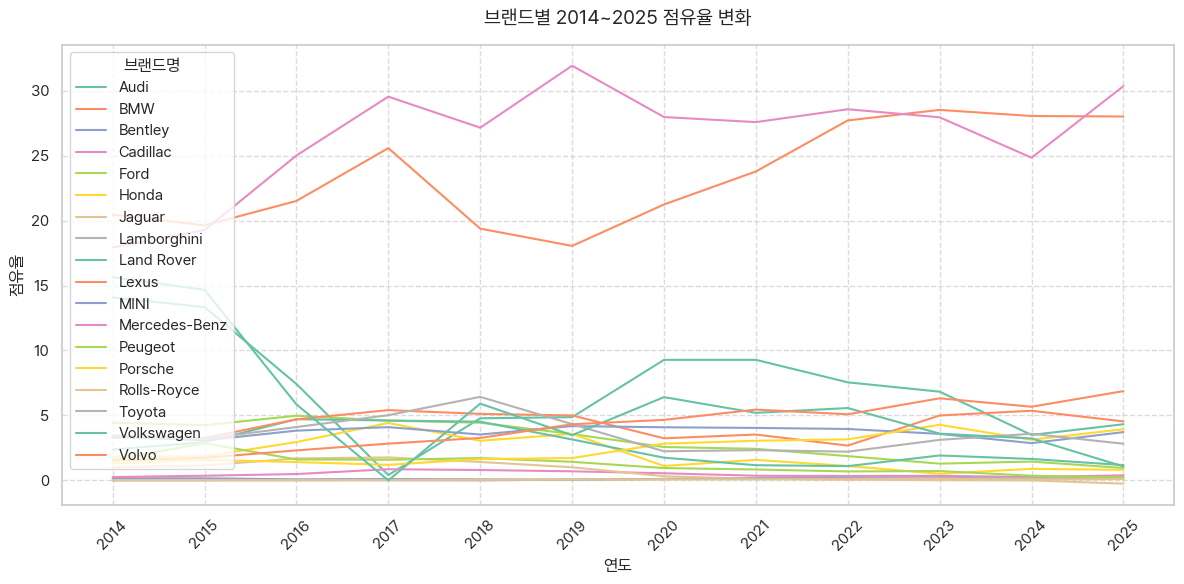

In [15]:
df_점유율 = df.loc[:, df.columns.str.contains('점유율') | (df.columns == '브랜드명')]
df_점유율 = df_점유율[df_점유율["브랜드명"] != "Total"]

# 데이터 변환 (브랜드를 기준으로 연도별 데이터 정리)
df_melted = df_점유율.melt(id_vars=['브랜드명'], var_name='연도', value_name='점유율')

# 연도에서 '점유율'라는 텍스트 제거
df_melted['연도'] = df_melted['연도'].str.replace('점유율', '')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='연도', y='점유율', hue='브랜드명', palette='Set2')

# 그래프 꾸미기
plt.title('브랜드별 2014~2025 점유율 변화', fontsize=14, pad=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('점유율', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='브랜드명', loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)

# 출력
plt.tight_layout()
plt.show()
plt.show()